In [1]:
import pandas as pd
import os

In [53]:
log_names = ["base.log", "base-sgd.log", "base-lr.log"]
logs = {}

for log_name in log_names:
    train_log = open(log_name)
    train_log_arr = []
    for i in train_log.read().split("\n"):
        if i:
            train_log_arr.append(float(i.split(":")[1]))

    logs[log_name.split(".")[0]] = train_log_arr

In [54]:
def get_equal_length_logs(logs):
    l = min([len(logs[i]) for i in logs])
    
    df_ready = {}
    for i in logs.keys():
        df_ready[i] = logs[i][:l] 
        
    return df_ready

df_cross_eval = pd.DataFrame(get_equal_length_logs(logs)) 

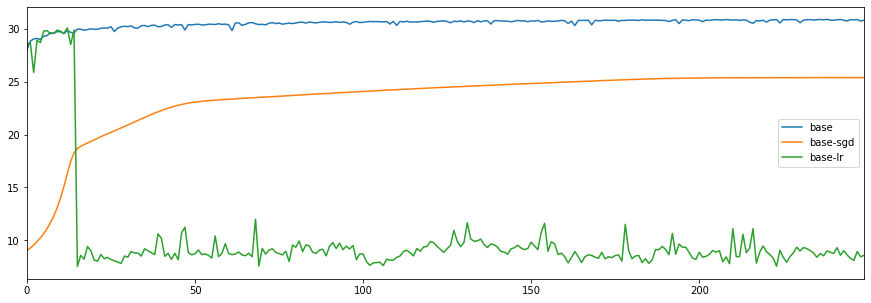

In [55]:
df_cross_eval.plot( figsize=(15, 5))

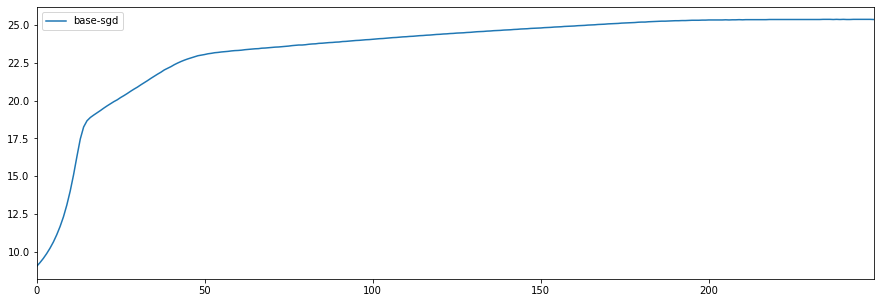

In [64]:
df_cross_eval[["base-sgd"]].plot(figsize=(15, 5))

### parse the training log copied from std output during training 

In [56]:
def process_train_loss_line(line):
    loss_arr = line.split("[")[-1].split(", ")[-1].replace("]", "").split("=")
    epoch = line.split(":")[1].split("/")[0]
    
    return float(loss_arr[1])
    
    

In [59]:
train_log_names = ["base-loss.log", "base-sgd-loss.log", "base-lr-loss.log"]
train_log_loss_arr = {}

for log_name in train_log_names:
    train_log_loss = open(log_name)
    train_log_loss_arr[log_name.split(".")[0]] = [process_train_loss_line(i) for i in train_log_loss.read().split("\n") if "epoch" in i]


df_train_loss = pd.DataFrame(get_equal_length_logs(train_log_loss_arr))
df_train_loss.head()

,base-loss,base-sgd-loss,base-lr-loss
0,0.068764,0.416275,0.078935
1,0.036296,0.402584,0.038575
2,0.033034,0.390440,0.036490
3,0.031417,0.373659,0.034232
4,0.031264,0.356863,0.032773


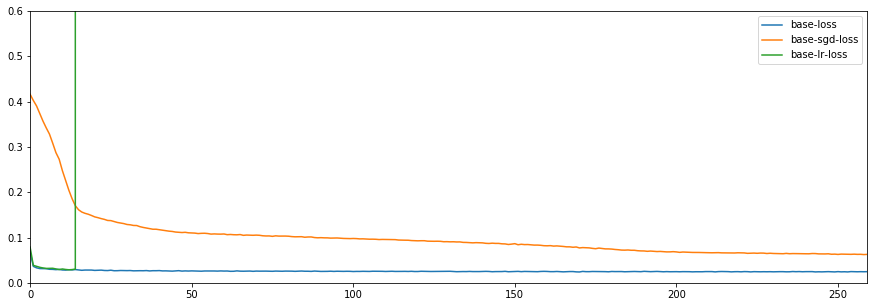

In [60]:
df_train_loss.plot(ylim=[0.0, .6], figsize=(15, 5))

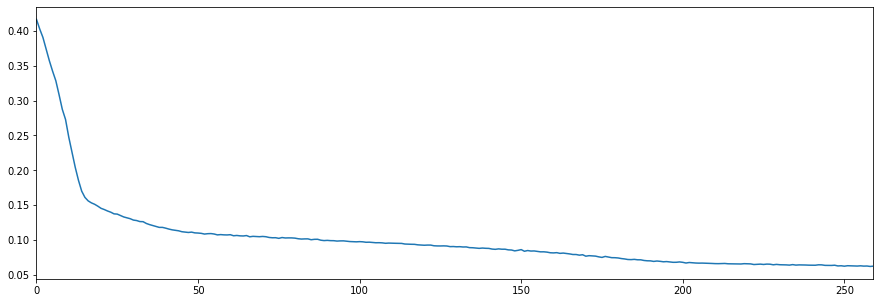

In [62]:
df_train_loss["base-sgd-loss"].plot(figsize=(15, 5))